In [1]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from cycler import cycler
import matplotlib as mpl
mpl.rcParams['axes.prop_cycle'] = cycler(color=["#bcbcbc", "#3388b6", "#ff993e"])

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
os.chdir(r"G:\Araki\SMSigxModel\analysis\9_plot_code")
in_path = r"..\8_out\Mahurangi\ws2_ex0.4"
out_path = r"..\10_plot\ws2_ex0.4"
if not os.path.exists(out_path):
   os.makedirs(out_path)

senario_names = ['KGE on Flow', 'KGE on Soil Moisture', 'KGE on seasonal transition', 'KGE on Flow + KGE on Soil Moisture', 'KGE on Flow + Seasonal Timing on Soil Moisture']
senario_short_names = ['Reference', 'None', 'None', 'SM magnitude', 'SM timings']

In [74]:
for i in range(1, 6):
    results_tot_metrics0 = pd.read_csv(os.path.join(in_path, f'senario_{i}', 'post_evaluations.csv'), index_col=0)
    tot_metrics_names = results_tot_metrics0.columns
    results_tot_metrics0['senario_id'] = i
    if i==1:
        results_tot_metrics = results_tot_metrics0
    else:
        results_tot_metrics = pd.concat([results_tot_metrics, results_tot_metrics0])

results_tot_metrics

,KGE on Flow,KGE on Soil Moisture Content,season_transition_dry2wet_s,season_transition_dry2wet_e,season_transition_wet2dry_s,season_transition_wet2dry_e,KGE on Flow_Behavioral,GLUE_results_Behavioral,senario_id,KGE on Soil Moisture Content_Behavioral,season_transition_dry2wet_s_Behavioral,season_transition_dry2wet_e_Behavioral,season_transition_wet2dry_s_Behavioral,season_transition_wet2dry_e_Behavioral
0,0.590231,0.635979,12.270570,28.128731,18.603654,0.345400,True,True,1,NaN,NaN,NaN,NaN,NaN
1,0.565222,0.583639,10.499610,17.108997,15.840759,35.207061,True,True,1,NaN,NaN,NaN,NaN,NaN
2,0.575150,0.550752,8.440500,23.426065,11.333597,30.974459,True,True,1,NaN,NaN,NaN,NaN,NaN
3,0.700024,0.059395,10.066578,4.123011,15.409693,37.978466,True,True,1,NaN,NaN,NaN,NaN,NaN
4,0.876575,0.847321,9.856901,25.451436,19.366933,2.328929,True,True,1,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9981,0.800518,0.720398,6.639237,23.941728,6.188337,26.434384,True,True,5,NaN,True,True,True,True
9983,0.848205,0.689276,7.620107,24.572893,20.839014,6.673190,True,True,5,NaN,True,True,True,True
9990,0.798985,0.650304,6.313472,24.836361,8.338684,26.739617,True,True,5,NaN,True,True,True,True
9998,0.846318,0.720921,4.348540,27.571210,22.562115,12.874940,True,True,5,NaN,True,True,True,True


In [75]:
tot_metrics_names

Index(['KGE on Flow', 'KGE on Soil Moisture Content',
       'season_transition_dry2wet_s', 'season_transition_dry2wet_e',
       'season_transition_wet2dry_s', 'season_transition_wet2dry_e',
       'KGE on Flow_Behavioral', 'season_transition_dry2wet_s_Behavioral',
       'season_transition_dry2wet_e_Behavioral',
       'season_transition_wet2dry_s_Behavioral',
       'season_transition_wet2dry_e_Behavioral', 'GLUE_results_Behavioral'],
      dtype='object')

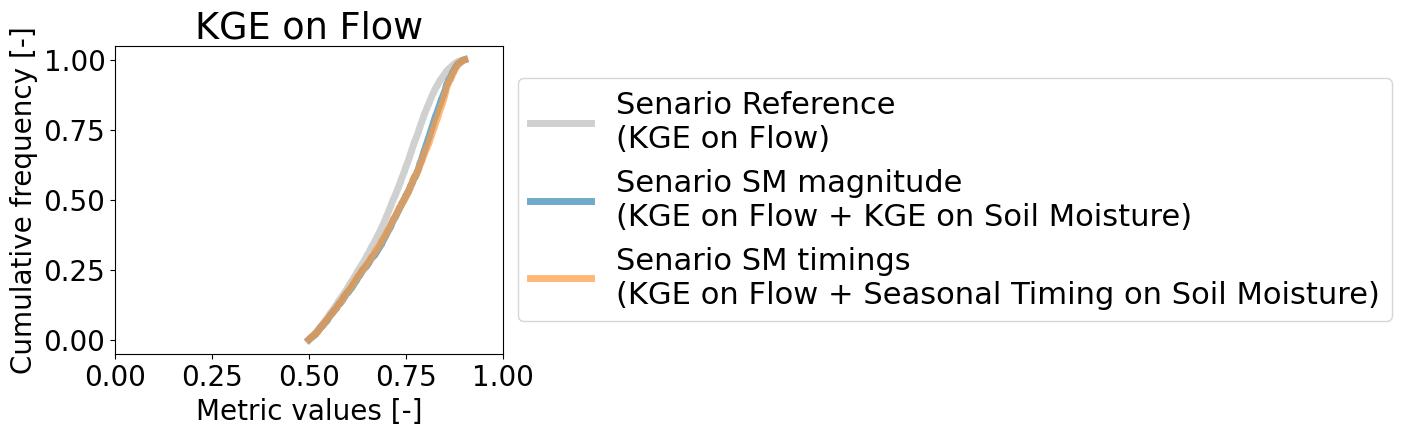

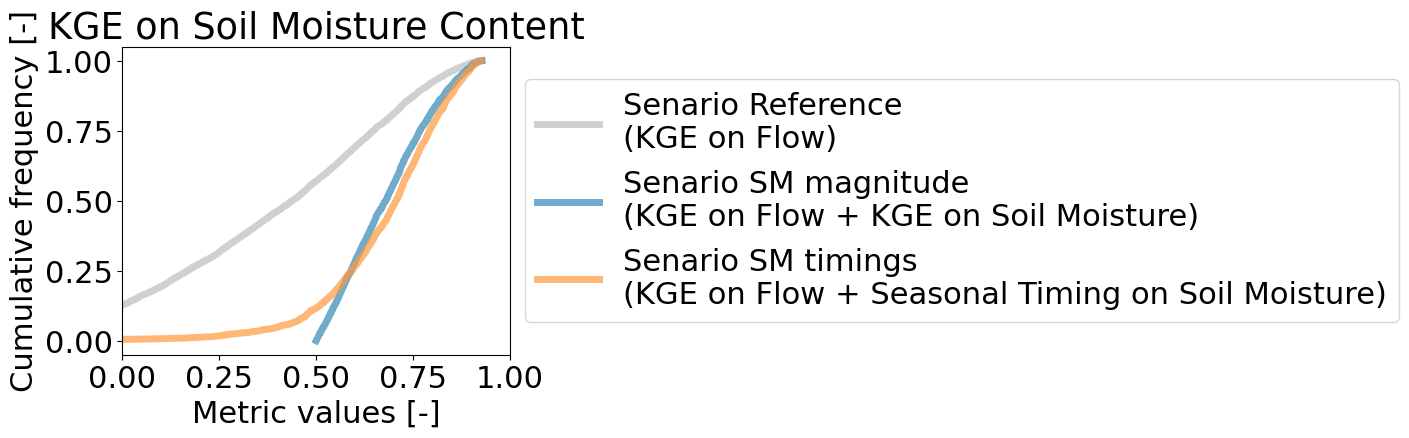

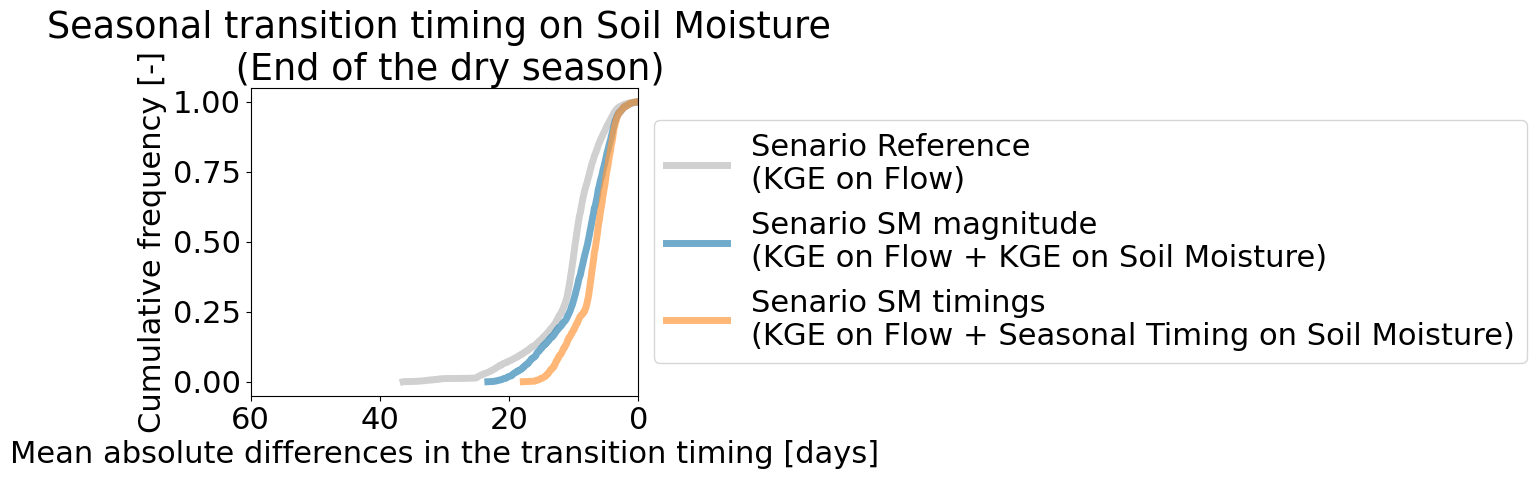

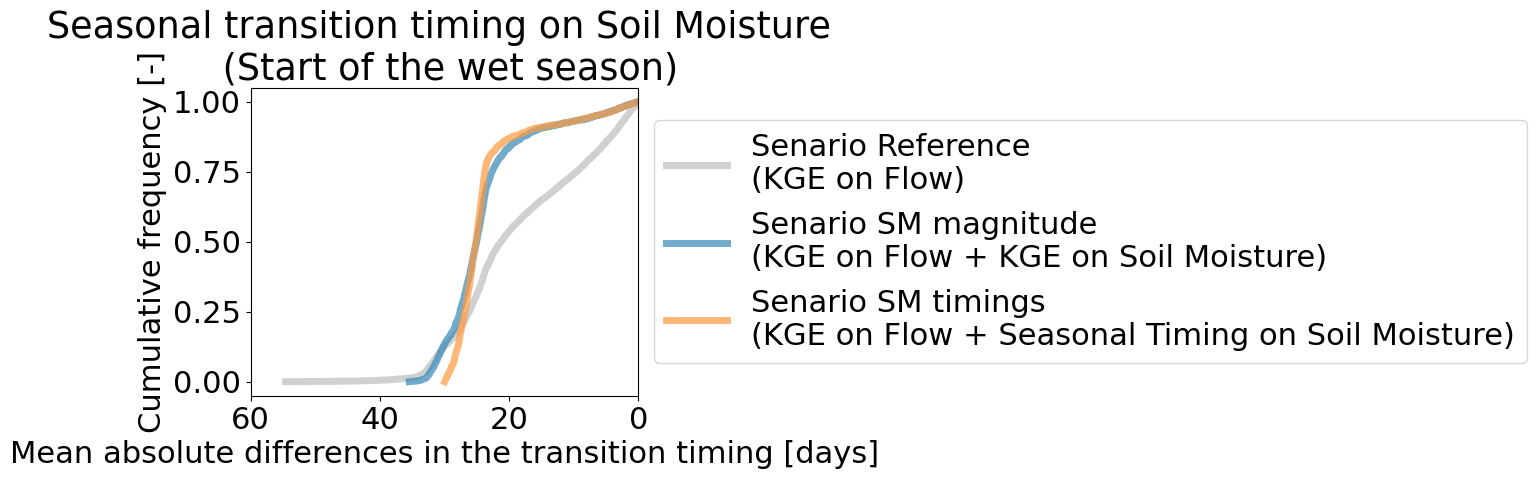

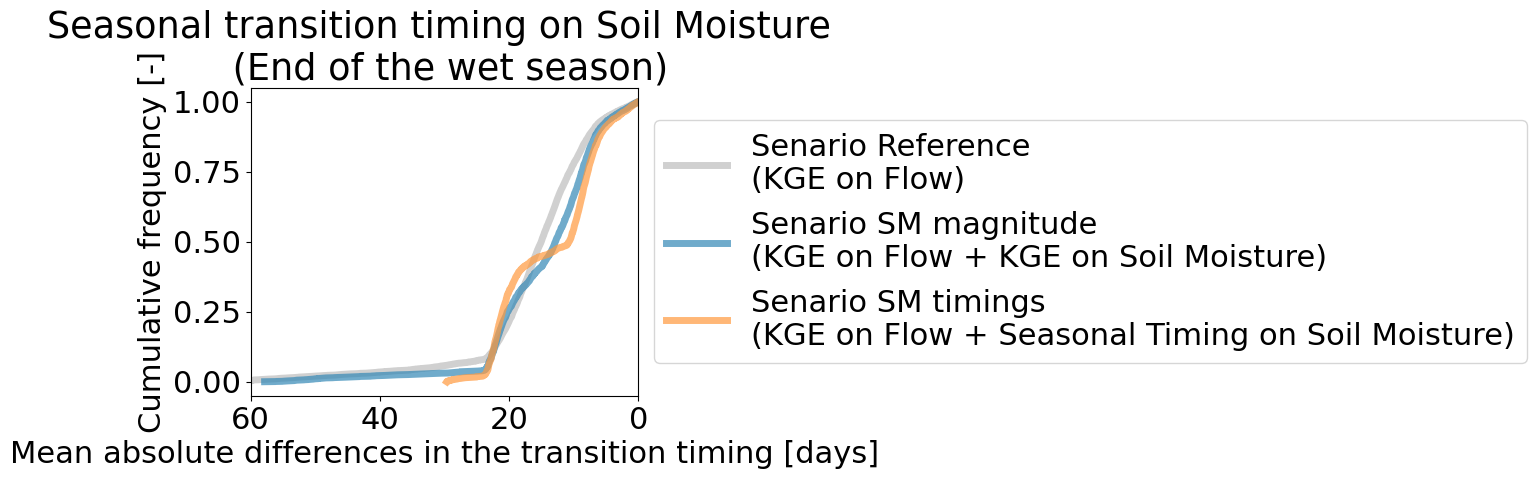

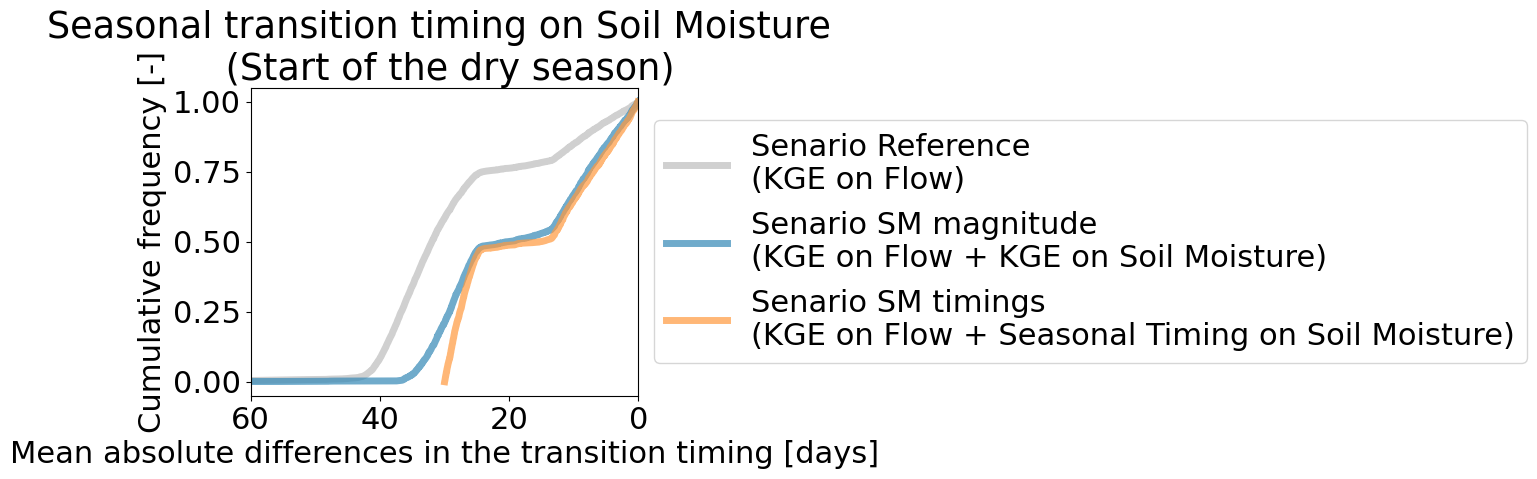

In [83]:
fig_title = ['KGE on Flow', 'KGE on Soil Moisture Content', 'Seasonal transition timing on Soil Moisture \n (End of the dry season)', 'Seasonal transition timing on Soil Moisture \n (Start of the wet season)', 
            'Seasonal transition timing on Soil Moisture \n (End of the wet season)', 'Seasonal transition timing on Soil Moisture \n (Start of the dry season)']
# colors = ['#BCBCBC', '#3388B6', '#3388B6', '#3388B6', '#FF993E']

for j in range(len(fig_title)):
    fig, ax = plt.subplots(figsize=(5,4))
    plt.rc('font', size=22)
    for i in [1,4,5]:
        data = results_tot_metrics[[tot_metrics_names[j], 'senario_id']][results_tot_metrics['senario_id']==i].copy()
        data_np = data[tot_metrics_names[j]].values

        # CDF 
        # https://www.statology.org/cdf-python/

        #sort data
        x = np.sort(data_np)
        
        if 'season' in tot_metrics_names[j]:
            x = x[::-1]
        
        #calculate CDF values
        y = 1. * np.arange(len(data_np)) / (len(data_np) - 1)
        
        #plot CDF
        plt.plot(x, y, label=f"Senario {senario_short_names[i-1]}\n({senario_names[i-1]})", linewidth=5, alpha=0.7)
        
    if 'season' in tot_metrics_names[j]:
        ax.set_xlim([0, 60])
        ax.set_xlabel('Mean absolute differences in the transition timing [days]')
        ax.invert_xaxis()
    else:
        ax.set_xlabel('Metric values [-]')
        ax.set_xlim([0, 1])
    ax.set_title(fig_title[j])
    ax.set_ylabel('Cumulative frequency [-]')
    plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    fig.savefig(os.path.join(out_path, f'CDF_{tot_metrics_names[j]}.pdf'), dpi=600, bbox_inches='tight')

In [7]:
for i in range(1, 6):
    results_monthly_metrics0 = pd.read_csv(os.path.join(in_path, f'senario_{i}', 'post_evaluations_monthly_metrics.csv'), index_col=0)
    monthly_metrics_names = results_monthly_metrics0.columns
    results_monthly_metrics0.index = pd.to_datetime(results_monthly_metrics0.index, format="%Y-%m-%d")
    results_monthly_metrics0['senario_id'] = i
    results_monthly_metrics0['Month'] = results_monthly_metrics0.index.month
    if i==1:
        results_monthly_metrics = results_monthly_metrics0
    else:
        results_monthly_metrics = pd.concat([results_monthly_metrics, results_monthly_metrics0])

In [8]:
results_monthly_metrics['Q_mean_bias'] = results_monthly_metrics['Q_mean_sim'] - results_monthly_metrics['Q_mean_obs']
results_monthly_metrics

,Q_mean_obs,Q_mean_sim,run_id,high_flow_freq_obs,high_flow_freq_sim,high_flow_freq_bias,RR_obs,RR_sim,RR_bias,senario_id,Month,Q_mean_bias
Time,,,,,,,,,,,,
1998-03-31,0.000028,0.000012,0,0.013441,0.010753,-0.002688,0.162265,0.069917,-0.092347,1,3,-0.000016
1998-04-30,0.000015,0.000002,0,0.000000,0.000000,0.000000,0.161294,0.021193,-0.140101,1,4,-0.000013
1998-05-31,0.000041,0.000021,0,0.009409,0.002688,-0.006720,0.310268,0.159212,-0.151056,1,5,-0.000020
1998-06-30,0.000129,0.000188,0,0.054167,0.170833,0.116667,0.545168,0.796149,0.250980,1,6,0.000059
1998-07-31,0.000604,0.000705,0,0.342742,0.661290,0.318548,0.770003,0.899820,0.129817,1,7,0.000102
...,...,...,...,...,...,...,...,...,...,...,...,...
2001-04-30,0.000098,0.000111,9999,0.059722,0.077778,0.018056,0.351672,0.399489,0.047817,5,4,0.000013
2001-05-31,0.000289,0.000401,9999,0.196237,0.305108,0.108871,0.582068,0.806618,0.224549,5,5,0.000112
2001-06-30,0.000094,0.000050,9999,0.012500,0.052778,0.040278,0.905890,0.482025,-0.423865,5,6,-0.000044


In [42]:
legend_names = []
legend_names.append('_Hidden')
legend_names.append('_Hidden')
for i in range(8*3+2):
    q, r = divmod(i+2, 8)
    if r==0:
        legend_names.append(f"Senario {senario_short_names[q-1]}\n({senario_names[q-1]})")
    else:
        legend_names.append('_Hidden')

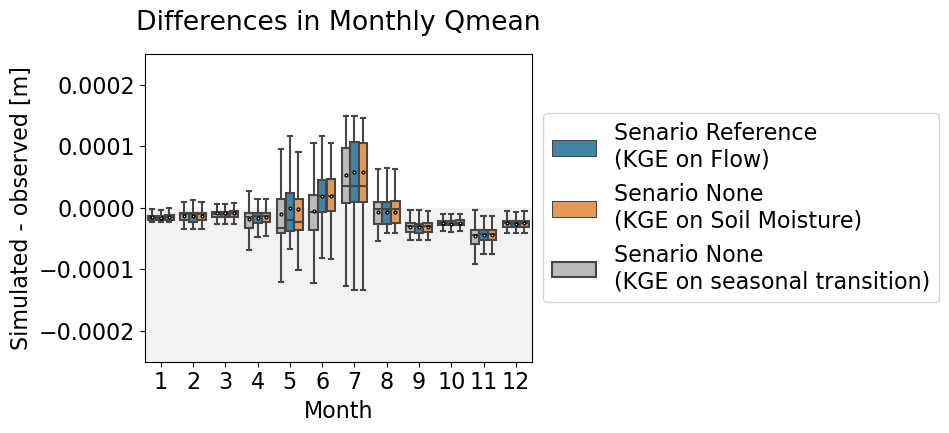

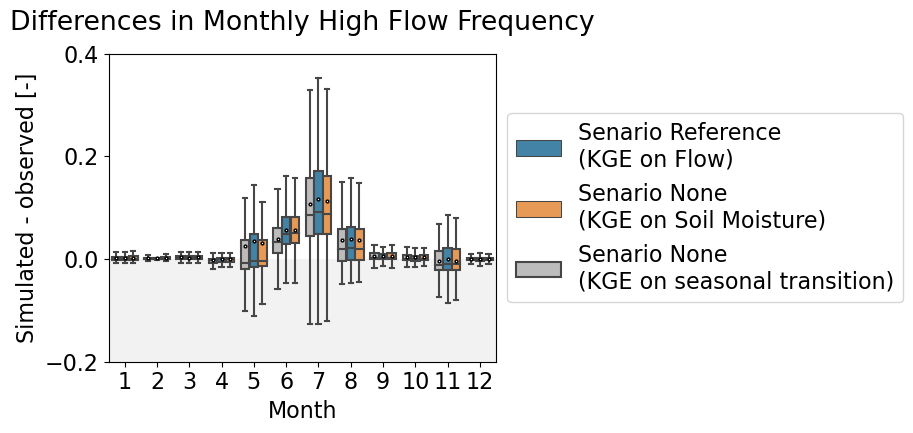

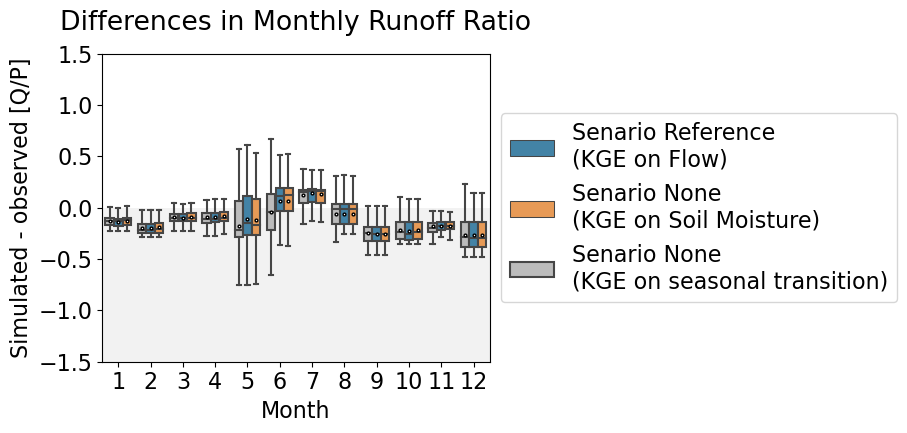

In [49]:
# Box plots
target_monthly_metrics = ['Q_mean_bias', 'high_flow_freq_bias', 'RR_bias']
fig_title = ['Differences in Monthly Qmean', 'Differences in Monthly High Flow Frequency', 'Differences in Monthly Runoff Ratio']
ylabel = ['Simulated - observed [m]', 'Simulated - observed [-]', 'Simulated - observed [Q/P]']
ymin = [-0.00025, -0.2, -1.5]
ymax = [0.00025, 0.4, 1.5]
# results_monthly_metrics['senario_id']==1 | results_monthly_metrics['senario_id']==3 | results_monthly_metrics['senario_id']==5
subset_results_monthly_metrics = results_monthly_metrics[(results_monthly_metrics['senario_id']==1) | (results_monthly_metrics['senario_id']==4) | (results_monthly_metrics['senario_id']==5)]


for j in range(len(target_monthly_metrics)):
    plt.figure(figsize=(5,4))
    plt.rc('font', size=16)
    boxplot = sns.boxplot(x='Month', y=target_monthly_metrics[j], data=subset_results_monthly_metrics, hue='senario_id', showfliers = False,zorder=10, showmeans=True, meanprops={"marker":"o",
                       "markerfacecolor":"white", 
                       "markeredgecolor":"black",
                      "markersize":"2"})
    boxplot.set_ylim([ymin[j], ymax[j]])
    boxplot.set_ylabel(ylabel[j])
    
    plt.legend(legend_names, loc='center left', bbox_to_anchor=(1, 0.5))
    plt.axhspan(ymin=-10, ymax=0, facecolor='gray', alpha=0.1, zorder=-1)
    plt.title(fig_title[j], y=1.05)
    fig = boxplot.get_figure()
    fig.savefig(os.path.join(out_path, f'MonthlyBoxPlot_{target_monthly_metrics[j]}.pdf'), bbox_inches='tight')

    

In [11]:
in_path2 = r"..\6_out\Mahurangi"
for i in [1,4,5]:
    results_quantile_Q_0 = pd.read_csv(os.path.join(in_path, f'senario_{i}', 'quantiles_Q.csv'), index_col=0)
    tot_metrics_names = results_tot_metrics0.columns
    results_quantile_Q_0['senario_id'] = i
    if i==1:
        results_quantile_Q = results_quantile_Q_0
    else:
        results_quantile_Q = pd.concat([results_quantile_Q, results_quantile_Q_0])

results_quantile_Q

,lowerlim,median,upperlim,senario_id
Time,,,,
1998-02-20 11:00:00,2.169368e-09,5.456562e-09,1.873241e-08,1
1998-02-20 12:00:00,4.409546e-09,1.105957e-08,3.750429e-08,1
1998-02-20 13:00:00,8.819091e-09,2.208737e-08,7.464927e-08,1
1998-02-20 14:00:00,4.621974e-09,1.159078e-08,3.929783e-08,1
1998-02-20 15:00:00,2.310987e-09,5.807949e-09,1.994138e-08,1
...,...,...,...,...
2001-09-06 12:00:00,8.946966e-05,4.777089e-04,8.686917e-04,5
2001-09-06 13:00:00,8.021616e-05,4.616310e-04,8.486075e-04,5
2001-09-06 14:00:00,7.261607e-05,4.491409e-04,8.267497e-04,5


In [12]:
in_path2 = r"..\6_out\Mahurangi"
for i in [1,4,5]:
    results_quantile_SM_0 = pd.read_csv(os.path.join(in_path, f'senario_{i}', 'quantiles_SM.csv'), index_col=0)
    tot_metrics_names = results_quantile_SM_0.columns
    results_quantile_SM_0['senario_id'] = i
    if i==1:
        results_quantile_SM = results_quantile_SM_0
    else:
        results_quantile_SM = pd.concat([results_quantile_SM, results_quantile_SM_0])

results_quantile_SM

,lowerlim,median,upperlim,senario_id
Time,,,,
1998-02-20 11:00:00,0.255402,0.407185,0.597803,1
1998-02-20 12:00:00,0.255413,0.407196,0.597814,1
1998-02-20 13:00:00,0.255413,0.407196,0.597814,1
1998-02-20 14:00:00,0.255413,0.407196,0.597814,1
1998-02-20 15:00:00,0.255413,0.407196,0.597814,1
...,...,...,...,...
2001-09-06 12:00:00,0.357434,0.481164,0.623106,5
2001-09-06 13:00:00,0.357434,0.481091,0.623106,5
2001-09-06 14:00:00,0.357434,0.481091,0.623106,5


In [13]:
obs = pd.read_csv(r'../2_data_input/Mahurangi/full/test_sm_basinavg.csv')
obs["Time"] = pd.to_datetime(obs["Time"], format="%m/%d/%Y %H:%M")
obs.set_axis(obs["Time"], axis=0, inplace=True)
obs

,Time,Time Step,Rainfall,Flow,Soil Moisture Content,Direct Runoff,GIUH Runoff,Lateral Flow,Base Flow,Total Discharge
Time,,,,,,,,,,
1998-02-20 11:00:00,1998-02-20 11:00:00,0,6.340000e-05,0.000010,0.348172,0,0,0,0,0.130001
1998-02-20 12:00:00,1998-02-20 12:00:00,1,1.140000e-05,0.000010,0.348084,0,0,0,0,0.124001
1998-02-20 13:00:00,1998-02-20 13:00:00,2,8.540000e-14,0.000009,0.348011,0,0,0,0,0.118001
1998-02-20 14:00:00,1998-02-20 14:00:00,3,0.000000e+00,0.000009,0.354702,0,0,0,0,0.113000
1998-02-20 15:00:00,1998-02-20 15:00:00,4,0.000000e+00,0.000008,0.354622,0,0,0,0,0.109000
...,...,...,...,...,...,...,...,...,...,...
2001-09-06 12:00:00,2001-09-06 12:00:00,31057,0.000000e+00,0.000188,0.456582,0,0,0,0,2.439010
2001-09-06 13:00:00,2001-09-06 13:00:00,31058,0.000000e+00,0.000184,0.456375,0,0,0,0,2.390010
2001-09-06 14:00:00,2001-09-06 14:00:00,31059,0.000000e+00,0.000181,0.456181,0,0,0,0,2.340010


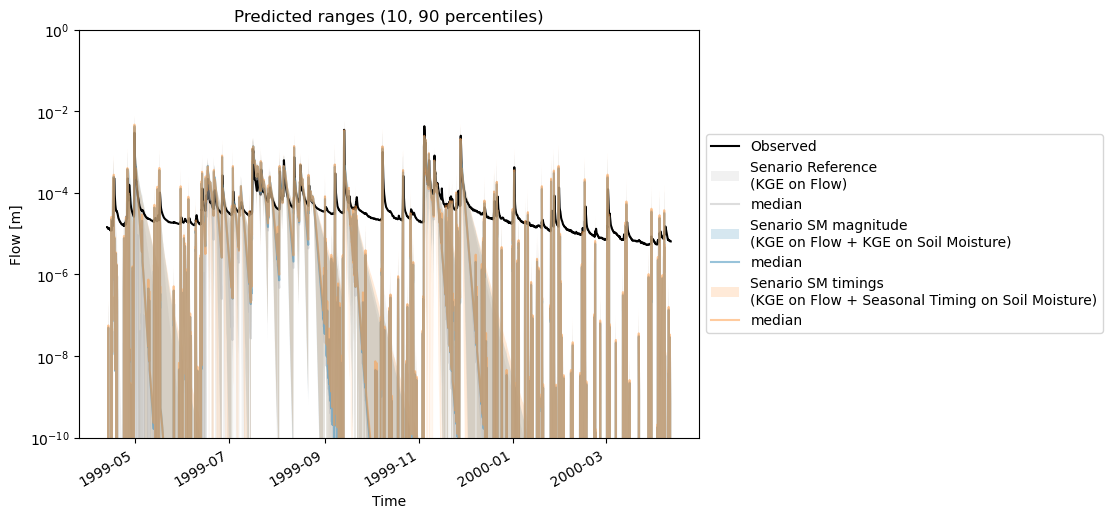

In [14]:

quantiles = [10, 50, 90]
color = ["#bcbcbc", "#3388b6", "#ff993e"]

results_quantile_Q.index = pd.to_datetime(results_quantile_Q.index)
results_quantile_SM.index = pd.to_datetime(results_quantile_SM.index)

###### FLOW #####
f2 = plt.figure(figsize=(8, 6))
ax2 = f2.add_subplot()
c=-1
ax2.plot(obs["Time"].iloc[10000:10000+24*365], obs["Flow"].iloc[10000:10000+24*365], color='k', label='Observed')
for i in [1,4,5]:
    c+=1
    df_simrange = results_quantile_Q[results_quantile_Q['senario_id']==i].copy()
    df_simrange_subset = df_simrange.iloc[10000:10000+24*365]
    plt.fill_between(df_simrange_subset.index, df_simrange_subset['upperlim'], df_simrange_subset['lowerlim'],
                 facecolor=color[c], alpha=0.2, interpolate=True, label=f"Senario {senario_short_names[i-1]}\n({senario_names[i-1]})")
    df_simrange_subset['median'].plot(color=color[c], alpha=0.5, ax=ax2)
    ax2.set_yscale('log')
    ax2.set_ylim([1E-10, 1])
    ax2.set_xlabel('Time')
    ax2.set_ylabel('Flow [m]')
    ax2.set_title('Predicted ranges (10, 90 percentiles)')
    plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
f2.autofmt_xdate()
f2.savefig(os.path.join(out_path, 'timeseries_Q.png'), dpi=600)

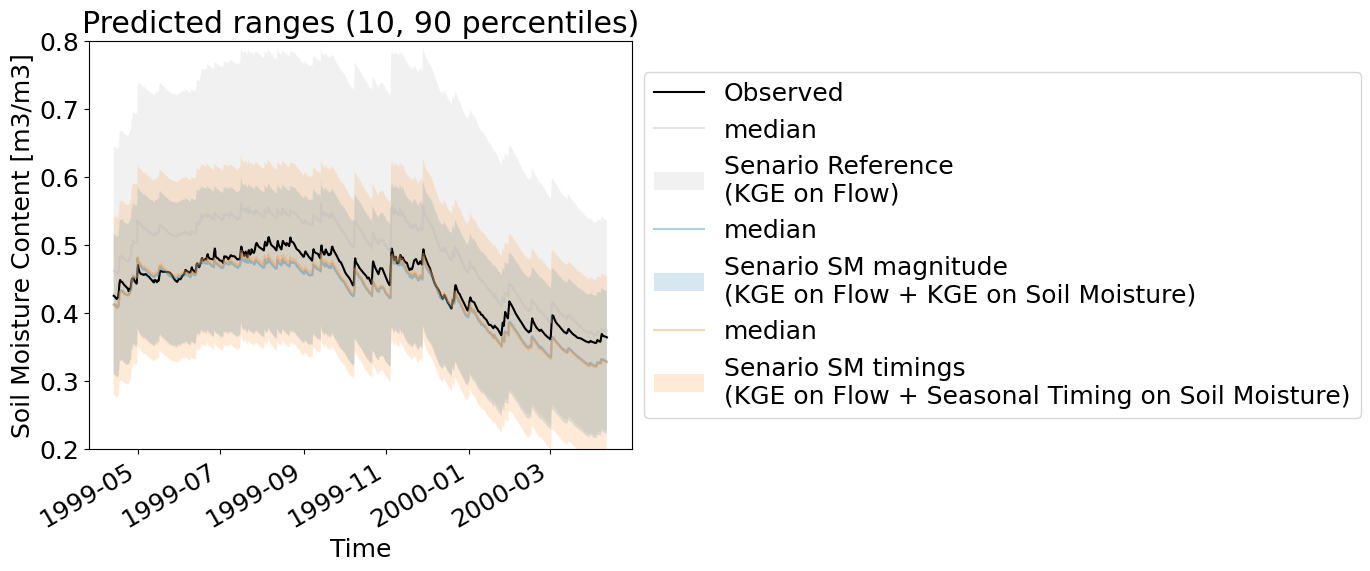

In [66]:
###### SM #####
f4 = plt.figure(figsize=(7, 6))
plt.rc('font', size=18)
ax4 = f4.add_subplot()
c=-1
ax4.plot(obs["Time"].iloc[10000:10000+24*365], obs["Soil Moisture Content"].iloc[10000:10000+24*365], color='k', label='Observed')
for i in [1,4,5]:
    c+=1
    df_simrange = results_quantile_SM[results_quantile_SM['senario_id']==i].copy()
    df_simrange_subset = df_simrange.iloc[10000:10000+24*365]
    df_simrange_subset['median'].plot(color=color[c], alpha=0.4, ax=ax4)
    plt.fill_between(df_simrange_subset.index, df_simrange_subset['upperlim'], df_simrange_subset['lowerlim'],
                 facecolor=color[c], alpha=0.2, interpolate=True, label=f"Senario {senario_short_names[i-1]}\n({senario_names[i-1]})")
    ax4.set_ylim([0.2, 0.8])
    ax4.set_xlabel('Time')
    ax4.set_ylabel('Soil Moisture Content [m3/m3]')
    ax4.set_title('Predicted ranges (10, 90 percentiles)')
    ax4.legend(loc='center left', bbox_to_anchor=(1, 0.5))
f4.autofmt_xdate()
f4.savefig(os.path.join(out_path, 'timeseries_SM.pdf'), dpi=600, bbox_inches='tight')


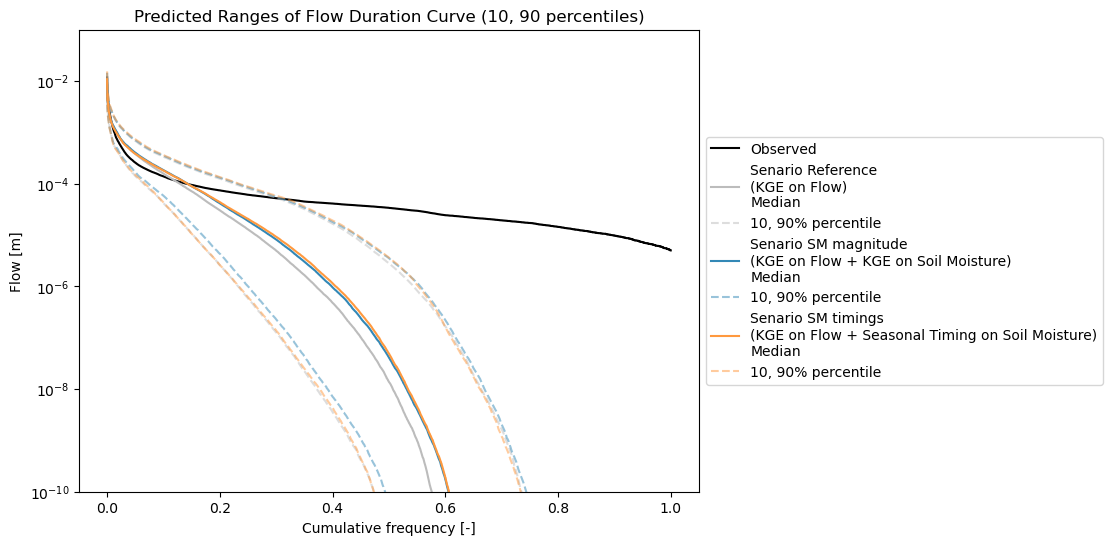

In [16]:
###### FLOW #####
f = plt.figure(figsize=(8, 6))
ax = f.add_subplot()
quantiles = [10, 50, 90]
color = ["#bcbcbc", "#3388b6", "#ff993e"]
c=-1
results_quantile_Q.index = pd.to_datetime(results_quantile_Q.index)

obs_fdc_x = np.sort(obs['Flow'].values)
obs_fdc_x = obs_fdc_x[::-1]
obs_fdc_y = 1. * np.arange(len(obs_fdc_x)) / (len(obs_fdc_x) - 1)
ax.plot(obs_fdc_y, obs_fdc_x, color='k', label='Observed')

for i in [1,4,5]:
    c+=1
    df_simrange = results_quantile_Q[results_quantile_Q['senario_id']==i].copy()
    
    #sort data
    median_fdc_x = np.sort(df_simrange['median'].values)
    median_fdc_x = median_fdc_x[::-1]
    median_fdc_y = 1. * np.arange(len(median_fdc_x)) / (len(median_fdc_x) - 1)
    upperlim_fdc_x = np.sort(df_simrange['upperlim'].values)
    upperlim_fdc_x = upperlim_fdc_x[::-1]
    upperlim_fdc_y = 1. * np.arange(len(upperlim_fdc_x)) / (len(upperlim_fdc_x) - 1)
    lowerlim_fdc_x = np.sort(df_simrange['lowerlim'].values)
    lowerlim_fdc_x = lowerlim_fdc_x[::-1]
    lowerlim_fdc_y = 1. * np.arange(len(lowerlim_fdc_x)) / (len(lowerlim_fdc_x) - 1)

    ax.plot(median_fdc_y, median_fdc_x, color=color[c], label=f"Senario {senario_short_names[i-1]}\n({senario_names[i-1]})\nMedian")
    ax.plot(upperlim_fdc_y, upperlim_fdc_x, color=color[c], alpha=0.5, linestyle='--', label='10, 90% percentile')
    ax.plot(lowerlim_fdc_y, lowerlim_fdc_x, color=color[c], alpha=0.5, linestyle='--', label='_Hidden')
    ax.set_yscale('log')
    ax.set_ylim([1E-10, 1E-01])
    ax.set_xlabel('Cumulative frequency [-]')
    ax.set_ylabel('Flow [m]')
    ax.set_title('Predicted Ranges of Flow Duration Curve (10, 90 percentiles)')
    ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
f.savefig(os.path.join(out_path, 'FDC_Q.png'), dpi=600, dpi=600, bbox_inches='tight')


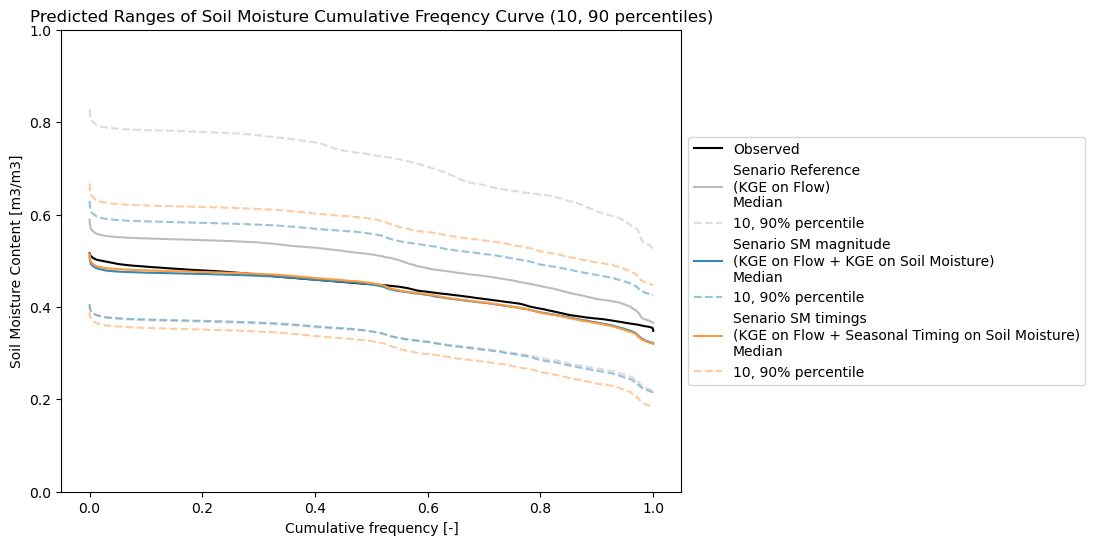

In [17]:
###### SM #####
f3 = plt.figure(figsize=(8, 6))
ax3 = f3.add_subplot()
quantiles = [10, 50, 90]
color = ["#bcbcbc", "#3388b6", "#ff993e"]
c=-1

obs_fdc_x = np.sort(obs['Soil Moisture Content'].values)
obs_fdc_x = obs_fdc_x[::-1]
obs_fdc_y = 1. * np.arange(len(obs_fdc_x)) / (len(obs_fdc_x) - 1)
ax3.plot(obs_fdc_y, obs_fdc_x, color='k', label='Observed')

for i in [1,4,5]:
    c+=1
    df_simrange = results_quantile_SM[results_quantile_SM['senario_id']==i].copy()
    
    #sort data
    median_fdc_x = np.sort(df_simrange['median'].values)
    median_fdc_x = median_fdc_x[::-1]
    median_fdc_y = 1. * np.arange(len(median_fdc_x)) / (len(median_fdc_x) - 1)
    upperlim_fdc_x = np.sort(df_simrange['upperlim'].values)
    upperlim_fdc_x = upperlim_fdc_x[::-1]
    upperlim_fdc_y = 1. * np.arange(len(upperlim_fdc_x)) / (len(upperlim_fdc_x) - 1)
    lowerlim_fdc_x = np.sort(df_simrange['lowerlim'].values)
    lowerlim_fdc_x = lowerlim_fdc_x[::-1]
    lowerlim_fdc_y = 1. * np.arange(len(lowerlim_fdc_x)) / (len(lowerlim_fdc_x) - 1)

    ax3.plot(median_fdc_y, median_fdc_x, color=color[c], label=f"Senario {senario_short_names[i-1]}\n({senario_names[i-1]})\nMedian")
    ax3.plot(upperlim_fdc_y, upperlim_fdc_x, color=color[c], alpha=0.5, linestyle='--', label='10, 90% percentile')
    ax3.plot(lowerlim_fdc_y, lowerlim_fdc_x, color=color[c], alpha=0.5, linestyle='--', label='_Hidden')
    # plt.fill_between(df_simrange_subset.index, df_simrange_subset['upperlim'], df_simrange_subset['lowerlim'],
    #              facecolor=color[c], alpha=0.2, interpolate=True, label='Predicted range')
    # ax3.set_yscale('log')
    ax3.set_ylim([0, 1])
    ax3.set_xlabel('Cumulative frequency [-]')
    ax3.set_ylabel('Soil Moisture Content [m3/m3]')
    ax3.set_title('Predicted Ranges of Soil Moisture Cumulative Freqency Curve (10, 90 percentiles)')
    ax3.legend(loc='center left', bbox_to_anchor=(1, 0.5))
f3.savefig(os.path.join(out_path, 'FDC_SM.png'), dpi=600)